In [2]:
seq_len = 1000
d_model = 512

In [9]:
import torch
import torch.nn as nn

def positional_embedding(seq_len, d_model):
    pe = torch.zeros(seq_len, d_model)
    position = torch.arange(0, seq_len).unsqueeze(1)
    div_term = torch.exp(torch.arange(0, d_model, 2) * -(torch.log(torch.tensor(10000.0)) / d_model))
    pe[:, 0::2] = torch.sin(position * div_term)
    pe[:, 1::2] = torch.cos(position * div_term)
    return pe.unsqueeze(0)

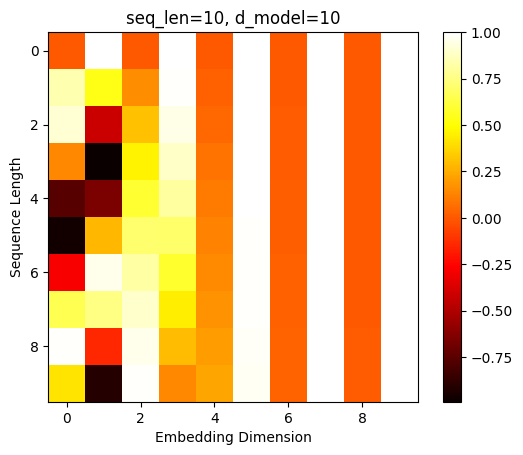

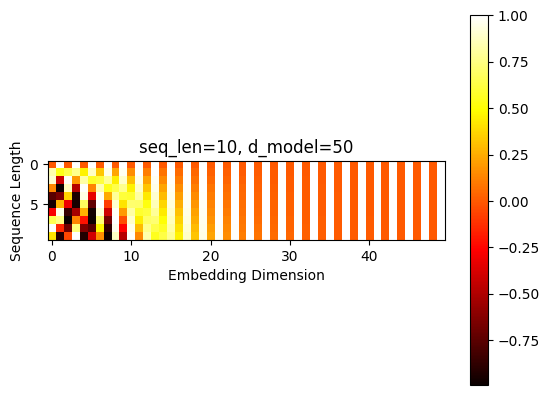

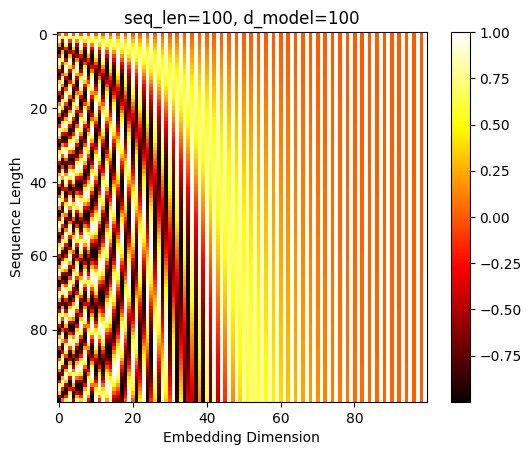

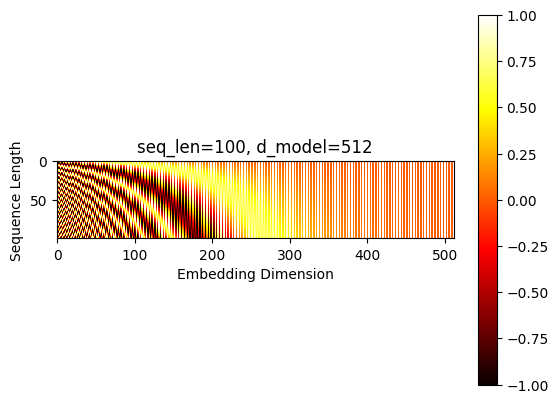

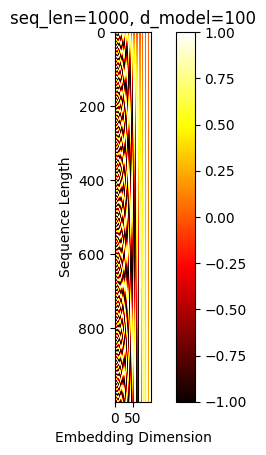

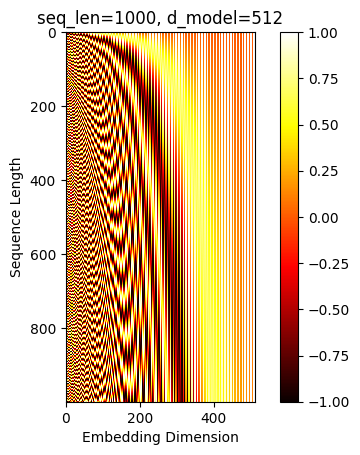

In [15]:
# draw the positional encoding
import matplotlib.pyplot as plt
# plot diff seq_len and d_model
for seq_len in [10, 100, 1000]:
    for d_model in [10, 50, 100, 512]:
        if (seq_len < 100 and d_model >= 100) or (seq_len >= 100 and d_model < 100):
            continue
        plt.figure()
        pe = positional_embedding(seq_len, d_model)[0]
        plt.imshow(pe, cmap='hot', interpolation='nearest')
        plt.xlabel("Embedding Dimension")
        plt.ylabel("Sequence Length")
        plt.title(f"seq_len={seq_len}, d_model={d_model}")
        plt.colorbar()
        plt.show()
    
# each dimension has a different frequency
# 对于较低维度的频率，由于频率较低，位置编码变化较慢，但这些低频分量对长距离依赖关系建模很重要
# 对于较高维度的频率，由于频率较高，位置编码变化较快，这有助于捕捉序列中的局部细节
# 位置编码的频率是通过位置编码的维度来控制的，这意味着不同维度的位置编码可以捕捉序列中不同范围的依赖关系
# dimension 越高，频率越慢，即较低的维度具有较高的频率，而较高的维度则具有较低的频率

In [5]:
class InputEmbedding(nn.Module):
    def __init__(self, vocab_size, d_model, seq_len):
        super(InputEmbedding, self).__init__()
        self.vocab_size = vocab_size
        self.d_model = d_model
        self.seq_len = seq_len
        self.embedding = nn.Embedding(vocab_size, d_model)
    
    def forward(self, x):
        # x: (batch_size, seq_len) --> (batch_size, seq_len, d_model)
        x = self.embedding(x)
        x = x * (self.d_model ** 0.5) # scale the embedding
        return x

In [8]:
from tokenizers import Tokenizer
text = "The quick brown fox jumps over the lazy dog."
tokenizer = Tokenizer.from_file('/workspaces/NetFromScrach/transformers/configs/tockenizer_en.json')
encoding = tokenizer.encode(text)
print(len(encoding.ids),encoding.ids)
input_embedding = InputEmbedding(tokenizer.get_vocab_size(), 512, 128)
output = input_embedding(torch.tensor(encoding.ids))
print(output.shape)
print(output)

10 [65, 1320, 2158, 4850, 14237, 124, 8, 8171, 794, 10]
torch.Size([10, 512])
tensor([[  9.8024,  23.5596,  -6.4995,  ..., -19.5401,  42.6353,  -3.8233],
        [-10.3505,  50.1235, -36.3080,  ...,  -0.5614,   2.4783,   5.2138],
        [ -7.7202, -43.5369,  28.7156,  ...,  11.6547, -12.4773,  11.4950],
        ...,
        [ 19.6805, -21.1418, -17.0955,  ...,  -1.7419, -12.8778,  -6.9196],
        [-29.8188,  -1.2330, -30.9839,  ...,  13.4612,  -4.5236,   1.0636],
        [-11.6879, -29.8515,   9.9602,  ...,   1.5946, -14.5288, -14.7967]],
       grad_fn=<MulBackward0>)
